**Students names :** Xianxiang ZHANG


# TP 1 : JPEG image compression

This multimedia tutorial is done in Python3, using the scikit-image library. The arrays used by this library to manipulate the images (ndarray) come from the numpy library. The documentation of these two libraries will be very useful.

**Note**: All the scripts of this tutorial work by default on an example image (a cat...), but other images are also provided with the tutorial so that you can evaluate the algorithms in various situations. You can also use your own images.

## Introduction: the principles of JPEG compression

The figure below shows the different steps involved in compressing and decompressing images in JPEG format. In this tutorial, we will not look at all of these operations in detail, but we will nevertheless focus on the fundamental concepts of JPEG (in particular the use of the Discrete Cosine Transform (DCT), quantization, as well as the coding of the resulting coefficients).

![Mon image d'illustration](figure/jpeg-encoder.gif)

## Downsampling

A simple way to reduce the amount of information in an image is to downsample it (i.e. reduce its size). This is what the script below does: we downsample (compress), then upsample (decompress) an image with different methods.




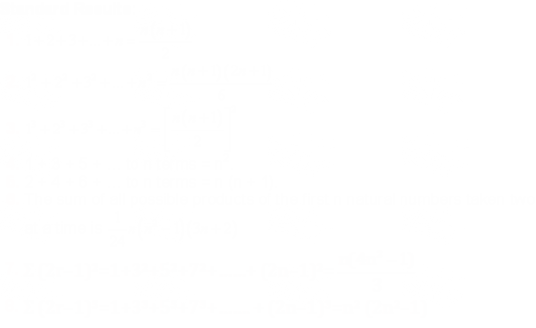


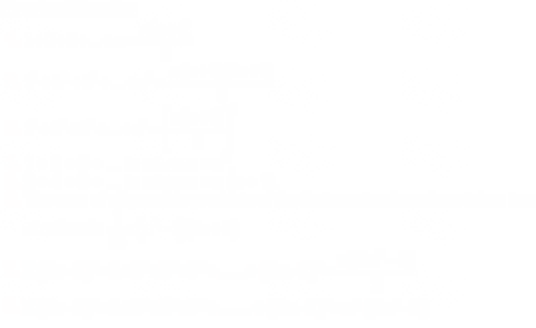


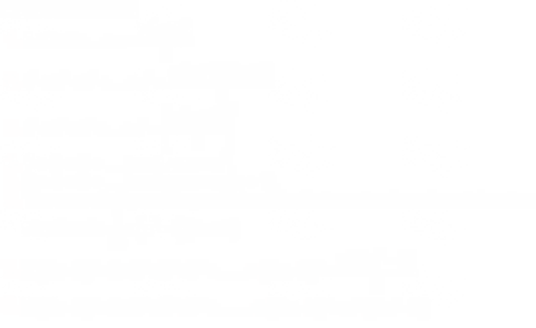


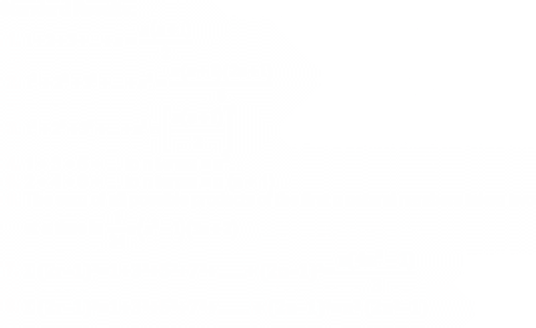

PSNR after global downscaling then upscaling (nearest neighbour):  22.42650303900789
PSNR after global downscaling then upscaling:  21.973786684926665
PSNR after global downscaling then upscaling:  22.685609086976626


In [1]:
# lets import the needed packages for the whole tutorial
import numpy as np
import random
from skimage import io
from skimage import transform
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from skimage import color
from skimage import metrics
from scipy import fftpack

# helps displaying matrices in a "nicer" way
np.set_printoptions(suppress=True)
np.set_printoptions(precision=0)
np.set_printoptions(threshold=1000)

# a sub-figure
fig = make_subplots(rows=2, cols=2)

# lets load an image
image = io.imread('./maths.gif')
#image = image(: ,: ,0:3)

# we resize the image to a multiple width and height of 8 (this will ease later processings)
image = transform.resize(image,(image.shape[0]//8*8,image.shape[1]//8*8))
fig = px.imshow(image)
fig.update_layout( title_text="Image originale", title_x=0.5)
fig.show()
width=image.shape[1]
height=image.shape[0]

# the downscale factor
downscale = 2

# downsampling of the image 
downsampled=transform.resize(image,(height//downscale,width//downscale))

# then upscaling (with different methods)
subsampled0=transform.resize(downsampled,(height,width),order=0)
subsampled1=transform.resize(downsampled,(height,width),order=1)
subsampled2=transform.resize(downsampled,(height,width),order=3)

# We display the images and PSNR values
fig = px.imshow(subsampled0)
fig.update_layout( title_text="Nearest neighbour", title_x=0.5)
fig.show()
fig = px.imshow(subsampled1)
fig.update_layout( title_text="Bilinear interpolation", title_x=0.5)
fig.show()
fig = px.imshow(subsampled2)
fig.update_layout( title_text="Bicubic interpolation", title_x=0.5)
fig.show()
print("PSNR after global downscaling then upscaling (nearest neighbour): ", metrics.peak_signal_noise_ratio(image,subsampled0))
print("PSNR after global downscaling then upscaling: ", metrics.peak_signal_noise_ratio(image,subsampled1))
print("PSNR after global downscaling then upscaling: ", metrics.peak_signal_noise_ratio(image,subsampled2))

**Question 1**: Test different subsampling factors (e.g. 2, 4, 8). 

1. For each, what is the compression ratio and the PSNR obtained?
2. Is the quality obtained good (you will find some reminders about PSNR here https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio) ?



**Answer 1:**

1. When the subsampling factor is 2, the compression is 1:4. PSNR after global downscaling then upscaling \(nearest neighbour\):  32.56801899292042. PSNR after global downscaling then upscaling\(Bilinear interpolation\):  33.71957356654805. PSNR after global downscaling then upscaling\(Bicubic interpolation\):  35.76928610314233.
   When the subsampling factor is 4, the compression is 1:16. PSNR after global downscaling then upscaling \(nearest neighbour\):  27.413390699975277. PSNR after global downscaling then upscaling\(Bilinear interpolation\):  28.396934204337526. PSNR after global downscaling then upscaling\(Bicubic interpolation\):  29.75423817722656. When the subsampling factor is 8, the compression is 1:64. PSNR after global downscaling then upscaling \(nearest neighbour\):  23.416667907814123. PSNR after global downscaling then upscaling\(Bilinear interpolation\):  23.898731493361154. PSNR after global downscaling then upscaling\(Bicubic interpolation\):  24.798972990812103
2. The quality obtained is not very good. When the PSNR is greater than 30dB, it is difficult for the human eye to detect the difference between the compressed and the original image. But the PSNR that we get are close to 30dB, so we can see a little difference. And when the PSNR is between 20dB and 30dB, the difference in the image can be seen.



The downsampling of the whole image may be a bit excessive... We can however take advantage of certain characteristics of our visual system to reduce the amount of data by downsampling in a less visible way. For this we will use a color space different from the classic RGB. We will use here the LUV space (JPEG uses the YCrCb / YUV space, quite close but not supported by scikit-image).




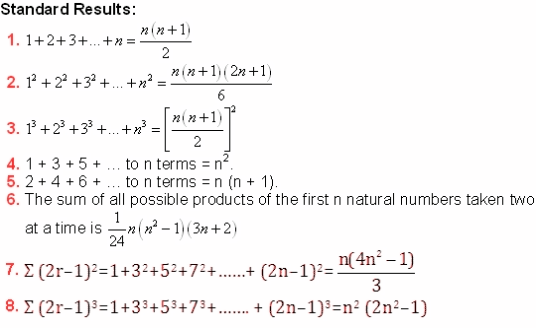

PSNR after downsampling then upsampling of chrominance channels:  36.2510348875955


In [2]:
# convert RGBA to RGB
if image.shape[2] == 4:
    image = color.rgba2rgb(image)
    
# the downscaling factor
downscale = 2

# we use a more appropriate color space
# and only downsample chrominance channels
imageYUV = color.rgb2luv(image)

L=imageYUV[:,:,0]
U=imageYUV[:,:,1]
V=imageYUV[:,:,2]

# downsampling of U and V channels
U=transform.resize(U,(height//downscale,width//downscale))
V=transform.resize(V,(height//downscale,width//downscale))
# then upscaling
U=transform.resize(U,(height,width))
V=transform.resize(V,(height,width))
# we reconstruct the image from the different channels
subsampled=imageYUV.copy()
subsampled[:,:,1] = U
subsampled[:,:,2] = V
subsampled = color.luv2rgb(subsampled)
fig = px.imshow(subsampled)
fig.update_layout( title_text="Chrominance downsampling", title_x=0.5)
fig.show()

print("PSNR after downsampling then upsampling of chrominance channels: ", metrics.peak_signal_noise_ratio(image,subsampled))

**Question 2:** 

1. As in question 1, vary the downsampling factor and observe the image quality obtained (visually and via PSNR). Also indicate the compression ratio obtained. 
2. Explain the results obtained (in particular, what is the difference between RGB and YUV and how does it affect the image quality). Remember to test the clown.jpg image, which is more colorful than the cats...



**Answer 2:** 

1. The compression is 1:2<u>_**\(\(1\+1/4\+1/4\)/3\)**_</u>. And the quality of the image is really good. The PSMR after downsampling then upsamlpling of hrominance channels is 50.43324323215806, when the PSNR is close to 50dB, it means that the compressed image with only a very small difference.
2. When using the RGB method, the compression will compress the R, G, and B three\-layer images at the same time, but when using the YUV method, the Y layer will be retained during compression, and only the U and V layers will be compressed. So using the YUV method can get a higher quality image. When we use the clown.jpg image, the PSMR after downsampling then upsampling of chorminance channels is 36.98546996772076, it is less than when we use the chat.jpg.



## DCT

We saw in the course of signal and image processing that it was possible to represent an image not by spatial information, but by frequency information. The Discrete Fourier Transform (DFT or FFT) allows to perform this transformation, but it is not the only one. The discrete cosine transform (DCT) is another one which has interesting properties.

**Note**: to simplify things we will work on gray level images, but the principles seen in this section can be extended simply by working on each of the 3 color channels of the image (Y, Cb and Cr in the case of JPEG).



In [3]:
from scipy import fftpack

# lets display the DCT base functions on 8x8 blocks
fig = make_subplots(rows=8, cols=8)
for i in range (0,8):
    for j in range(0,8):
        a=np.zeros((8,8))
        a[i,j]=1
        # the 2D DCT is performed as a series of 1D DCT
        ia=fftpack.idct(fftpack.idct(a).T).T
        #ax[i,j].imshow(ia,cmap='gray')
        fig.add_trace(px.imshow(ia, binary_string=True).data[0], row=1+i, col=1+j)
fig.update_xaxes(visible=False) 
fig.update_yaxes(visible=False) 
fig.show()

**Question 3:** 

1. Examine and explain the DCT base functions generated by the above script.
2. Among the DCT on 8x8 blocks done in JPEG and the discrete Fourier transform that one would apply globally on the image, which transform(s):

- Allows the analysis of the energy distribution according to frequencies?
    - Provide information on the location in the image of these frequencies?

3. Which other tool better addresses this problem of simultaneous localization and frequency analysis? Is it used in some image compression formats?



**Answer 3:**

1. [To](http://1.To) examine and explain the DCT base functions generated by the above script, we can analyze the patterns in each of the 64 basis functions displayed in the 8x8 grid. Each basis function represents a different combination of spatial frequencies in the input image. The basis functions in the top\-left corner have the lowest spatial frequencies and represent smooth variations in intensity across the image. As we move to the bottom\-right corner, the basis functions have higher spatial frequencies and represent finer details in the image.

2. [In](http://2.In) JPEG compression, an 8x8 block of the input image is transformed using the DCT, and the resulting coefficients are quantized and compressed. The DCT is used because it allows for the analysis of the energy distribution according to frequencies, and it is well\-suited for image compression since most of the image energy is concentrated in the low\-frequency coefficients, which can be quantized more aggressively. The DCT also provides some information on the location in the image of these frequencies, since each 8x8 block is transformed independently.

3. However, the DCT is not ideal for simultaneous localization and frequency analysis since it only operates on small, non\-overlapping blocks of the image. A more powerful tool for this purpose is the Discrete Wavelets Transform \(DWT\), which operates on multiple scales and positions simultaneously and can provide a more detailed analysis of the frequency content of an image at different spatial locations. The DWT is used in some image compression formats, such as JPEG2000.



The following script calculates the DCT coefficients of all the 8x8 blocks of our image.




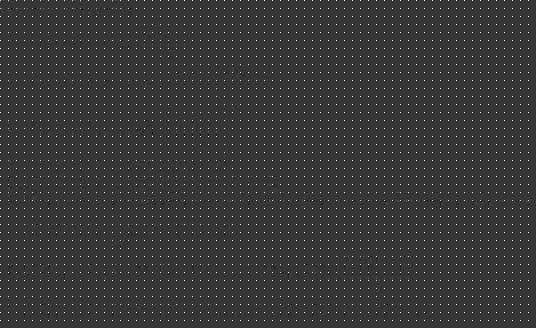

DCT coefficients of one DCT block
[[1572.  138.  180.   41. -150. -121.   24.   85.]
 [ -19.   49. -148. -123.   45.   29.  -38.  -53.]
 [  64.  -11. -118.  -90.   27.   48.  -25.  -62.]
 [-144.  114.  -40.  -40.   46.  -46.  -22.   33.]
 [  25.   -9.   -9.    6.   17.   -8.   -3.    8.]
 [ 154. -133.   19.   79.   23.  -55.   -2.   53.]
 [   1.   20.   33.    8.  -17.   37.   16.  -20.]
 [  11.   -1.   23.   14.   -8.   12.    9.   -3.]]


In [4]:
# we apply a DCT transform on all the 8x8 blocks of the image
greyimg=color.rgb2gray(image)
dctimg=np.zeros(greyimg.shape)

for y in range(0,height,8):
    for x in range(0, width,8):
        bloc=greyimg[y:y+8,x:x+8]
        dctimg[y:y+8,x:x+8]=fftpack.dct(fftpack.dct(bloc,norm='ortho').T,norm='ortho').T

fig = px.imshow(dctimg, binary_string=True)
fig.update_layout( title_text="DCT coefficients of our image", title_x=0.5)
fig.show()

# we also display the DCT coefficients of an (arbitrary chosen) block
print("DCT coefficients of one DCT block")
x=20*8
y=20*8
print((255*dctimg[y:y+8,x:x+8]).round())

**Question 4:** 

1. What is the size of the obtained image ? What would have been the size of the image if we had used an FFT ?
2. Relate the DCT base functions to the coefficients obtained for each 8x8 block.
3. In particular, what is the significance of the coefficient located in the upper left corner of each block (do not rely on the displayed value, it depends on the normalization used for the DCT) ?



**Answer 4:**

1. The size of the obtained image is the same as the original image, which is determined by the greyimg.shape attribute. The dctimg array has the same dimensions as greyimg, which is the height and width of the image.
   If we had used an FFT instead of a DCT, the size of the resulting image would have been the same as well. However, the meaning of the coefficients would be different since the FFT produces coefficients that represent both magnitude and phase information in the frequency domain, while the DCT only represents magnitude information.
2. The DCT base functions are cosine waves with different frequencies and amplitudes. The coefficients obtained for each 8x8 block represent the amplitudes of these cosine waves at different frequencies. 
3. The coefficient located in the upper left corner of each block corresponds to the lowest frequency component or the DC component. This coefficient represents the average brightness of the 8x8 block and is usually much larger than the other coefficients. This is because the DC component contributes to the overall brightness of the block, which is why it carries most of the energy in the block. The other coefficients represent higher frequency components or AC components, which capture the details and variations in the block. The higher frequency coefficients are usually smaller in magnitude and contain less energy because they capture finer details.



We now perform the inverse transform to recreate the original image (so we don't compress for the moment)




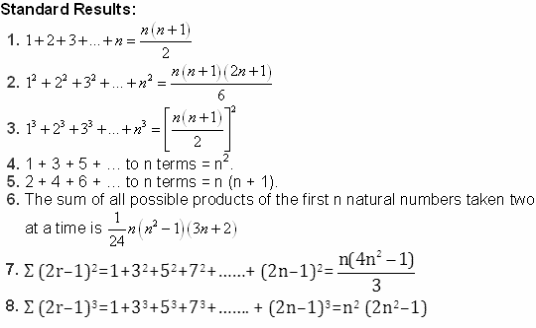

PSNR after DCT / iDCT:  312.09241597944856
% of null coefficients 55.2346878412814


In [5]:
# "Perfect" reconstruction
compressedimg=np.zeros(greyimg.shape)

for y in range(0,height,8):
    for x in range(0, width,8):
        bloc=dctimg[y:y+8,x:x+8]
        compressedimg[y:y+8,x:x+8]=fftpack.idct(fftpack.idct(bloc,norm='ortho').T,norm='ortho').T

fig = px.imshow(compressedimg, binary_string=True)
fig.update_layout( title_text="'Perfect' reconstruction", title_x=0.5)
fig.show()

print("PSNR after DCT / iDCT: ", metrics.peak_signal_noise_ratio(greyimg,compressedimg))
print("% of null coefficients", 100*(dctimg == 0).sum()/greyimg.size)


**Question 5:** Does the PSNR obtained correspond to the one you expected (theoretically)? What is the reason for this?



**Answer 5**:

No, the value of the PSNR is so high, the PSNR can be used to quantify the difference between the original and reconstructed images, where a higher PSNR indicates a better quality reconstruction. 

Since we are not compressing the image, there is no loss in image quality.



It is time to compress our image... For that we will carry out a quantization of the DCT coefficients in order to limit the set of possible values and thus facilitate the compression ( lossless this time) of these simplified coefficients.



DCT coefficients of a 8x8 block after n*Q quantization with n= 4
[[1600.  132.  200.   64. -192. -160.    0.    0.]
 [  -0.   48. -168. -152.    0.    0.   -0.   -0.]
 [  56.   -0. -128.  -96.    0.    0.   -0.   -0.]
 [-168.  136.   -0.   -0.    0.   -0.   -0.    0.]
 [   0.   -0.   -0.    0.    0.   -0.   -0.    0.]
 [ 192. -140.    0.    0.    0.   -0.   -0.    0.]
 [   0.    0.    0.    0.   -0.    0.    0.   -0.]
 [   0.   -0.    0.    0.   -0.    0.    0.   -0.]]
PSNR after DCT / quantification / iDCT:  25.61439561916422
% of null coefficients 92.75687113214416



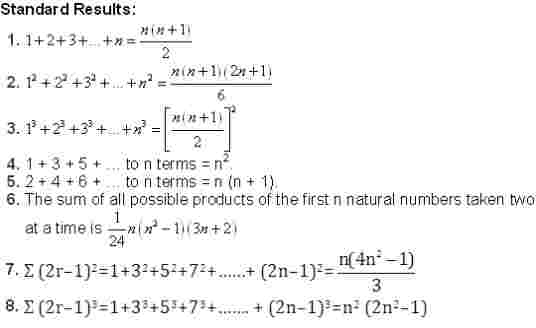

DCT coefficients of a 8x8 block after n*Q quantization with n= 1
[[1568.  143.  180.   48. -144. -120.    0.   61.]
 [ -24.   48. -154. -114.   52.   48.  -60.  -55.]
 [  70.  -13. -112.  -96.   40.   57.   -0.  -56.]
 [-140.  119.  -44.  -29.   51.  -87.   -0.   62.]
 [  18.   -0.   -0.    0.    0.   -0.   -0.    0.]
 [ 144. -140.    0.   64.    0. -104.   -0.   92.]
 [   0.    0.    0.    0.   -0.    0.    0.   -0.]
 [   0.   -0.    0.    0.   -0.    0.    0.   -0.]]
PSNR after DCT / quantification / iDCT:  32.57073991345177
% of null coefficients 86.326560793593



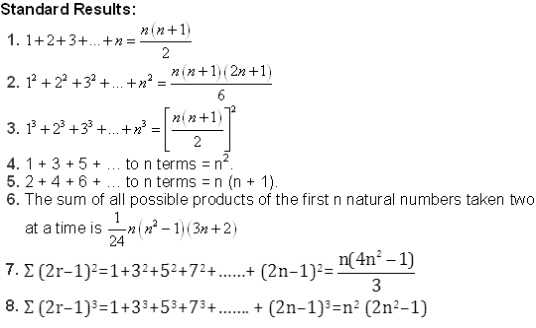

DCT coefficients of a 8x8 block after n*Q quantization with n= 0.5
[[1576.  138.  180.   40. -144. -120.   26.   92.]
 [ -18.   48. -147. -124.   39.   24.  -30.  -55.]
 [  63.  -13. -120.  -96.   20.   57.  -34.  -56.]
 [-147.  110.  -44.  -44.   51.  -44.  -40.   31.]
 [  27.  -11.   -0.    0.    0.   -0.   -0.    0.]
 [ 156. -140.   28.   64.   40.  -52.   -0.   46.]
 [   0.   32.   39.    0.   -0.   60.    0.   -0.]
 [   0.   -0.    0.    0.   -0.    0.    0.   -0.]]
PSNR after DCT / quantification / iDCT:  37.195156229899574
% of null coefficients 82.36314615944667



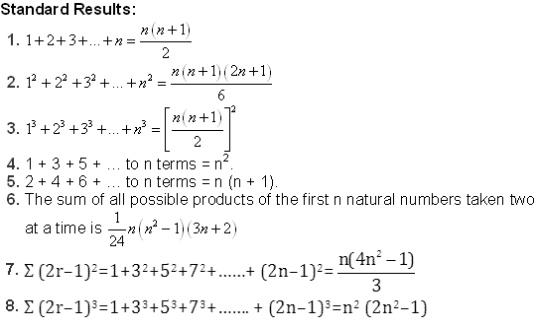

DCT coefficients of a 8x8 block after n*Q quantization with n= 0.1
[[1573.  138.  180.   42. -149. -120.   26.   85.]
 [ -19.   49. -148. -124.   44.   29.  -36.  -55.]
 [  63.  -12. -118.  -91.   28.   46.  -28.  -62.]
 [-144.  114.  -40.  -41.   46.  -44.  -24.   31.]
 [  25.   -9.   -7.    6.   14.  -11.   -0.    8.]
 [ 154. -133.   16.   77.   24.  -52.   -0.   55.]
 [   0.   19.   31.    9.  -21.   36.   12.  -20.]
 [  14.   -0.   19.   10.  -11.   10.   10.   -0.]]
PSNR after DCT / quantification / iDCT:  49.8340981676637
% of null coefficients 74.3851246814707



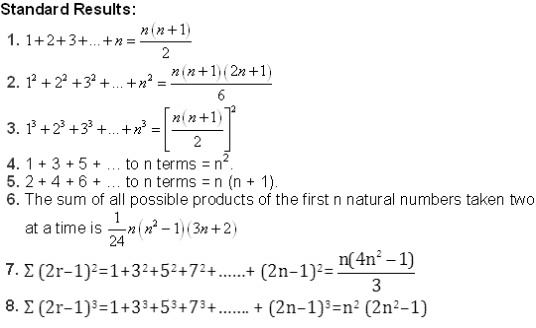

In [6]:
quantized=np.zeros(greyimg.shape)

# the standard JPEG quantization matrix
Q=np.array([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,48,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])/255

# the different values in N helps generating images of different quality
N=(4, 1, 0.5, 0.1)

for n in N:
    # image quantization et reconstruction
    for y in range(0,height,8):
        for x in range(0, width,8):
            bloc=dctimg[y:y+8,x:x+8]
            quantized[y:y+8,x:x+8]=np.multiply(np.round(np.divide(bloc,n*Q)),n*Q)
            compressedimg[y:y+8,x:x+8]=fftpack.idct(fftpack.idct(quantized[y:y+8,x:x+8],norm='ortho').T,norm='ortho').T

    # truncate too big or low values
    compressedimg[compressedimg>1]=1
    compressedimg[compressedimg<0]=0
    
    # lets display the coefficients of a 8x8 block after quantization
    print("DCT coefficients of a 8x8 block after n*Q quantization with n=",n)
    x=20*8
    y=20*8
    print((255*quantized[y:y+8,x:x+8]).round())
    print("PSNR after DCT / quantification / iDCT: ", metrics.peak_signal_noise_ratio(greyimg,compressedimg))
    print("% of null coefficients", 100*(quantized == 0).sum()/greyimg.size)
    
    fig = px.imshow(compressedimg, binary_string=True)
    fig.update_layout( title_text="Reconstruction after n*Q quantization with n="+str(n), title_x=0.5)
    fig.show()
 


**Question 6:** 

1. Comment on the quantization matrix (contained in variable Q).
2. Observe the percentage of null DCT coefficients ( according to the importance of quantization). Why is this interesting?
3. In JPEG, the DCT coefficients are reordered with a zigzag coding before being compressed (lossless = RLE + Huffman). Why?
![My illustration image](figure/zigzag.jpg)
4. The PSNR is displayed for each case. Try to establish a correspondence between visual quality and PSNR.
5. Do this work on several images, in particular comment the result obtained on the image maths.gif



**Answer 6:**

1. The quantization matrix is a key part of the JPEG compression algorithm because it determines the trade\-off between image quality and compression ratio. The matrix is applied to the DCT coefficients after calculation, the higher the value in the matrix, the more important the corresponding DCT coefficient is considered.
2. The percentage of null DCT coefficients reflects how much the quantization matrix affects image quality. A high proportion of zero coefficients means that many coefficients are set to zero due to quantization, which indicates high compression ratio but also low image quality. On the other hand, a low percentage of zero coefficients means more coefficients are kept, which leads to higher image quality but also lower compression ratio.
3. In JPEG, the DCT coefficients are reordered with a zigzag coding before being compressed because it allows for more efficient compression of the coefficient values. The zigzag order groups the coefficients by their frequency, which tends to result in runs of coefficients with similar values. This makes the RLE step more effective, as it can encode repeated values as a single value followed by a count. The Huffman coding step then compresses the RLE\-encoded values based on their probability of occurrence in the image.
4. The higher the PSNR, the better the visual quality of the image.
5. Regarding the image maths.gif, it is a binary image with sharp edges and high contrast, which makes it more difficult to compress without losing quality. As expected, the results of compression with different quantization factors \(n\) show that as n decreases, the percentage of null coefficients decreases and the PSNR increases. However, even with the lowest quantization factor \(n=0.1\), the compressed image still shows significant loss of quality compared to the original, especially in the edges and fine details.



## Progressive transmission

The script below shows a (simplified) example of how one could transmit DCT coefficients in a progressive way (in a context of transmission on a slow network).


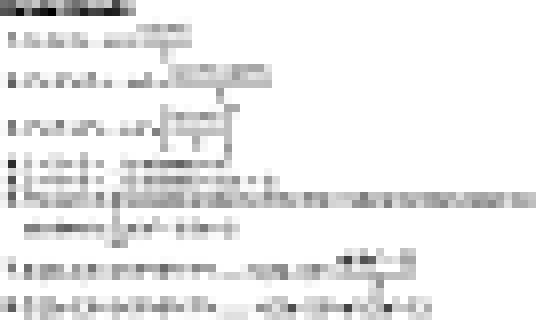

PSNR after the transmission of  3.125 % of the coefficients :  17.85021254865943
% of  null coefficients 98.4375



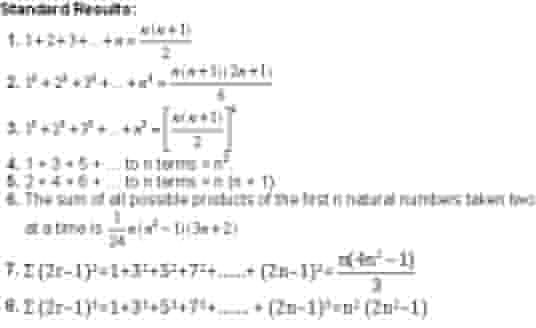

PSNR after the transmission of  10.9375 % of the coefficients :  19.785977156273717
% of  null coefficients 96.05080542409901



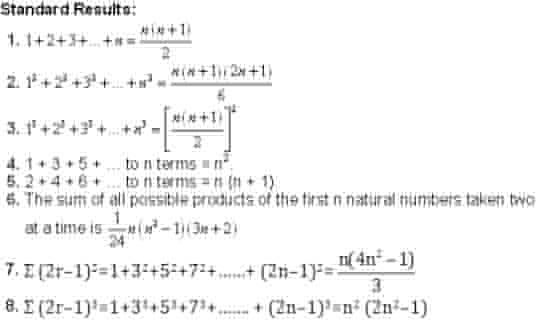

PSNR after the transmission of  18.75 % of the coefficients :  21.50140020007474


% of  null coefficients 93.71245904623225



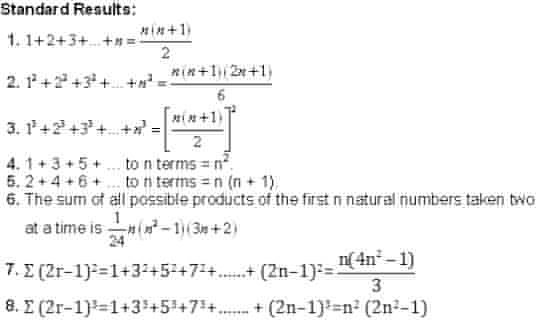

PSNR after the transmission of  26.5625 % of the coefficients :  23.097017265359042
% of  null coefficients 91.40369038951583



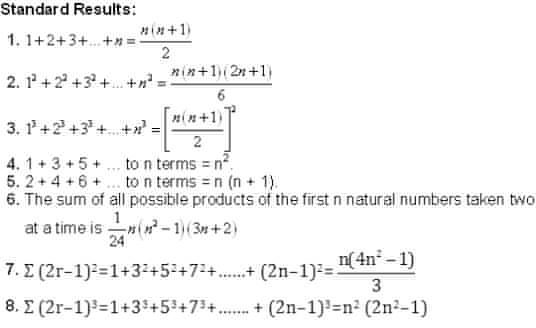

PSNR after the transmission of  34.375 % of the coefficients :  24.488981638308168
% of  null coefficients 89.157489989079



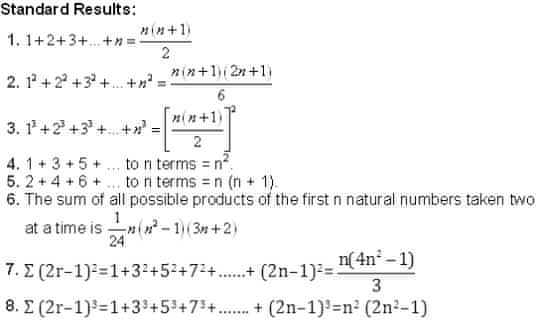

PSNR after the transmission of  42.1875 % of the coefficients :  25.896306016004083
% of  null coefficients 86.99717874044413



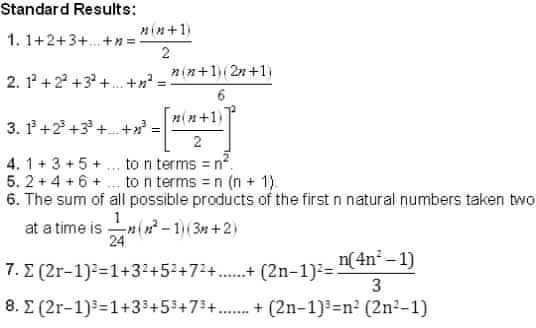

PSNR after the transmission of  50.0 % of the coefficients :  27.617214192446635
% of  null coefficients 84.98020567892246



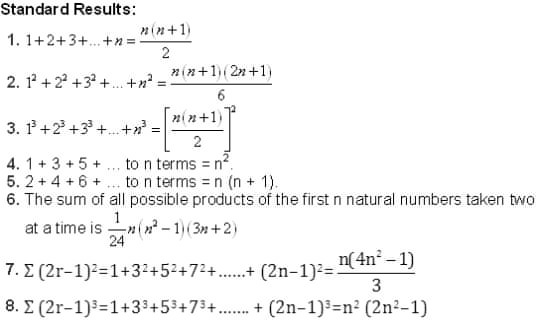

PSNR after the transmission of  57.8125 % of the coefficients :  29.443199345459487
% of  null coefficients 82.94787495449582



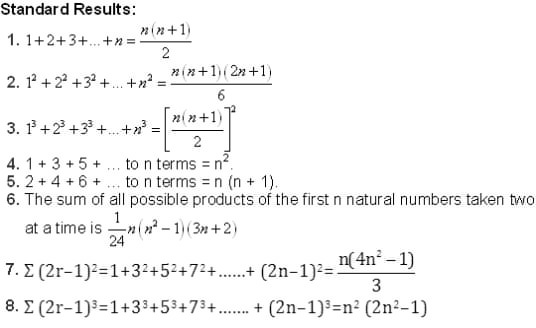

PSNR after the transmission of  65.625 % of the coefficients :  30.890560898687696
% of  null coefficients 81.0082590098289



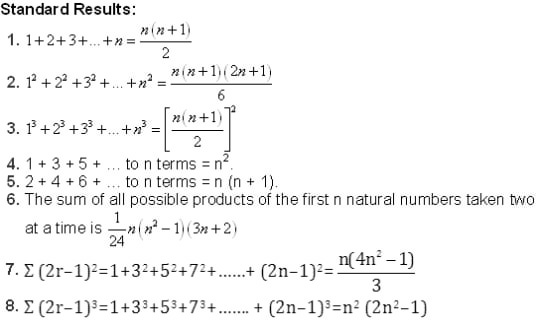

PSNR after the transmission of  73.4375 % of the coefficients :  32.76539480263107
% of  null coefficients 79.31607207863124



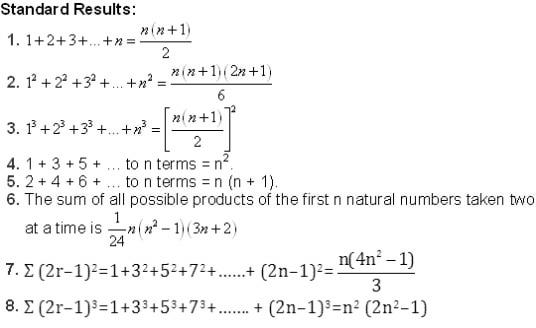

PSNR after the transmission of  81.25 % of the coefficients :  34.47395240475977
% of  null coefficients 77.63582999635966



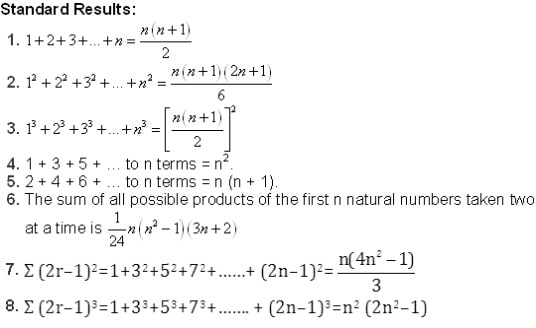

PSNR after the transmission of  89.0625 % of the coefficients :  37.86233702919374
% of  null coefficients 76.22064979978158



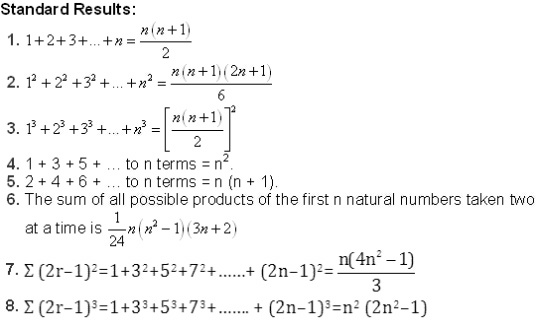

PSNR after the transmission of  96.875 % of the coefficients :  42.224582631669136
% of  null coefficients 74.9800919184565


In [7]:
# "Progressive" JPEG

zigzagorder = [ 1,  9,  2,  3,  10, 17, 25, 18, 11, 4,  5,  12, 19, 26, 33, 41, 34, 27, 20, 13, 6,  7,  14, 21, 28, 35, 42, 49, 57, 50, 43, 36, 29, 22, 15, 8,  16, 23, 30, 37, 44, 51, 58, 59, 52, 45, 38, 31, 24, 32, 39, 46, 53, 60, 61, 54, 47, 40, 48, 55, 62, 63, 56, 64]

# we have 13 progressive transmission levels
for level in range(1, 64, 5):
    # We proceed block by block
    for y in range(0,height*8//8,8):
        for x in range(0, width*8//8,8):
            bloc=np.zeros((8,8))
            # And keep only part of the data
            for i in range(0,level):
                yy=(zigzagorder[i]-1)//8
                xx=(zigzagorder[i]-1)%8
                bloc[yy,xx]=dctimg[y+yy,x+xx]
            quantized[y:y+8,x:x+8]=np.multiply(np.round(np.divide(bloc,Q*0.1)),Q*0.1)
            compressedimg[y:y+8,x:x+8]=fftpack.idct(fftpack.idct(quantized[y:y+8,x:x+8],norm='ortho').T,norm='ortho').T
    
    # truncate too big or low values
    compressedimg[compressedimg>1]=1
    compressedimg[compressedimg<0]=0
    
    fig = px.imshow(compressedimg, binary_string=True)
    fig.update_layout( title_text="Reconstruction after the transmission of "+ str(100*(level+1)/64) + "% of the coefficients", title_x=0.5)
    fig.show()
    
    print("PSNR after the transmission of ", str(100*(level+1)/64),  "% of the coefficients : ", metrics.peak_signal_noise_ratio(greyimg,compressedimg))
    print("% of  null coefficients", 100*(quantized == 0).sum()/greyimg.size)

**Question 7:** 

1. What is the principle of this progressive transmission?
2. Test it on different types of images (and in particular maths.gif). Is this method suitable for any type of content?



**Answer 7:**

1. The principle of progressive transmission in JPEG is to gradually transmit the compressed image, from a low\-quality version to a high\-quality version, by sending the compressed image in several passes. During each pass, only a subset of the DCT coefficients is transmitted. This allows the receiver to gradually reconstruct the image, starting with a low\-resolution version, and then refining it with each additional pass. The advantage of this method is that it allows for a quicker initial display of the image, while the higher quality details continue to be transmitted and added to the image in subsequent passes.
2. This method is suitable for different types of images, but the quality of the obtained images varies. Progressive transmission is suitable for images with gradual changes in intensity or color, gradually adding detail without noticeable [artifacts. ](http://artifacts.In)[In](http://artifacts.In) the specific case of maths.gif, it is a relatively simple image with mostly uniformly colored areas and sharp edges, so the progressive transfer works reasonably well, reaching acceptable visual quality after a few passes. However, as expected, PSNR increases with the transmission of more coefficients, suggesting that the higher the number of passes, the higher the quality.



## Encoding of zero-frequency DCT coefficients

In JPEG, DCT coefficients of zero frequency (DC component) undergo DPCM encoding. The script below should help you understand why.


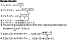

mean value, standard deviation of the zero-frequency coefficient of all the blocks:  7.71588228870589 0.5541460717150377



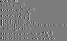

mean value, standard deviation  of the DC component of each block after DPCM coding:  0.0007988334501198438 0.44689397572630085


In [8]:
# We only keep DC coefficients
coefscont=np.zeros((height//8, width//8))
for y in range(0,height*8//8,8):
    for x in range(0, width*8//8,8):
        coefscont[y//8,x//8] = dctimg[y,x]
        
fig = px.imshow(coefscont, binary_string=True)
fig.update_layout( title_text="zero-frequezncy coefficients", title_x=0.5)
fig.show()
print("mean value, standard deviation of the zero-frequency coefficient of all the blocks: ", coefscont.mean(), coefscont.std())

# different between one zero-frequency coefficient and the previous one
reshapeddc=coefscont.reshape((width*height//64,1))
dpcmcoefs=np.zeros(width*height//64)
for i in range(1,width*height//64):
    dpcmcoefs[i]=reshapeddc[i]-reshapeddc[i-1]
coefscont=dpcmcoefs.reshape((height//8,width//8))

fig = px.imshow(coefscont, binary_string=True)
fig.update_layout( title_text="Differnce with the previous coefficient (left)", title_x=0.5)
fig.show()
print("mean value, standard deviation  of the DC component of each block after DPCM coding: ", dpcmcoefs.mean(), dpcmcoefs.std())


**Question 8:**  Observe the results of the script in order to:

1. Explain what DPCM coding is
2. Justify the interest of this coding for zero frequency coefficients.



**Answer 8:**

1. DPCM  is a type of compression that involves encoding the difference between a sample and a predicted value instead of encoding the sample itself. In this script, DPCM is used to encode the difference between each zero\-frequency coefficient and the previous one in the zigzag order.
2. The interest of using DPCM coding for zero\-frequency coefficients is that they tend to have a smaller range of values and are often correlated with their neighboring coefficients. By using DPCM coding, we can take advantage of this correlation and represent the coefficients with fewer bits than if we encoded them directly. Additionally, by using DPCM coding, we can reduce the sensitivity to quantization errors, which can result in a better compression ratio.



## Transmission errors correction

A good decoder must be a good (and fast) error concealer: the script below sets to zero some blocks of DCT coefficients in the image, simulating very roughly transmission problems.


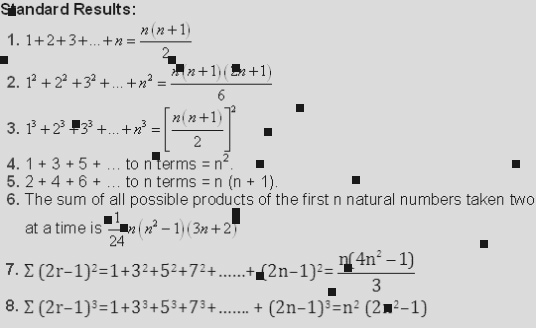

PSNR after errors:  21.538617450277965



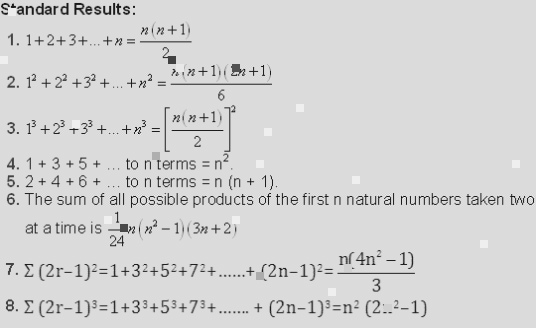

PSNR after error concealment:  30.07332779847339


In [9]:
# We simulate packet loss
dcterror=quantized.copy()
probaerror=0.01
for y in range(0,height,8):
    for x in range(0, width,8):
        if random.random() <= probaerror:
            dcterror[y:y+8,x:x+8] = 0;

# write here your error concealment code
# your code here !!!

# image reconstruction
for y in range(0,height,8):
    for x in range(0, width,8):
        compressedimg[y:y+8,x:x+8]=fftpack.idct(fftpack.idct(dcterror[y:y+8,x:x+8],norm='ortho').T,norm='ortho').T

fig = px.imshow(compressedimg, binary_string=True)
fig.update_layout( title_text="Image with missing blocks", title_x=0.5)
fig.show()
print("PSNR after errors: ", metrics.peak_signal_noise_ratio(greyimg,compressedimg))

# error concealment using linear interpolation
for y in range(0,height-8,8):
    for x in range(0, width-8,8):
        if dcterror[y:y+8,x:x+8].sum() == 0:
            w=0.1
            estimated_pixel = (1-w)*(compressedimg[y,x] + compressedimg[y+8,x+8]) + w*(compressedimg[y,x+8] + compressedimg[y+8,x])
            compressedimg[y:y+8,x:x+8] = estimated_pixel
fig = px.imshow(compressedimg, binary_string=True)
fig.update_layout( title_text="Using linear interpolation", title_x=0.5)
fig.show()
print("PSNR after error concealment: ", metrics.peak_signal_noise_ratio(greyimg,compressedimg))


**Question 9:** 

1. Which technique could be used to mask (partially) these errors before decoding the image ?
2. Implement your technique in the above script and see (hopefully) the improvement of the PSNR



**Answer 9:**

1. One technique that could be used to mask these errors before decoding the image is to interpolate the missing blocks using neighboring blocks. One way to implement this technique is to use linear interpolation.
2. Set the weighting factor to 0.1 for the balance between the two diagonal pixels and the two horizontal/vertical pixels. We can see that the quality of the repaired image has been significantly improved through the generated pictures, and we can also conclude that the image quality has improved through the increase of the PSNR value.



## Decoding improvement

You may have noticed that when the compression rate of a JPEG image is high, you can clearly see the transition between the different 8x8 blocks of the image.

**Question 10:** 

1. How could the image be improved during decoding to mitigate these transitions?
2. Should the way this filtering is done be included in the JPEG standard?



**Answer 10:**

1. One way to alleviate visible transitions between different 8x8 blocks in a JPEG image is to use a smoothing filter. This can be achieved by applying a low pass filter to the image during decoding, which will smooth the transitions between blocks and create a smoother image.
2. This filtering technique can improve the visual quality of the image, but it also increases the computational complexity of the decoding process and can cause blurring in the image. Therefore, we should decide whether to use this filtering method according to different situations.



## Bonus : dithering

We saw in this tutorial that the quantization of DCT coefficients was much more efficient than the quantization of pixel values (as done in image processing tutorials) to achieve a high compression but preserving the quality of the image.
There is however a way to improve the quality of the direct quantization of the pixel values: dithering...




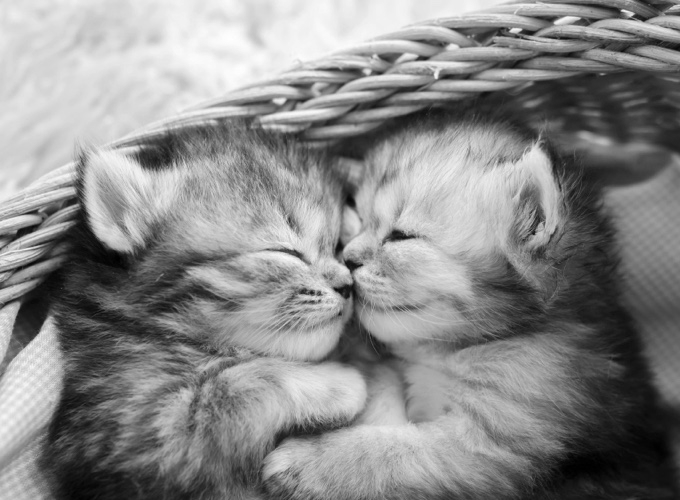


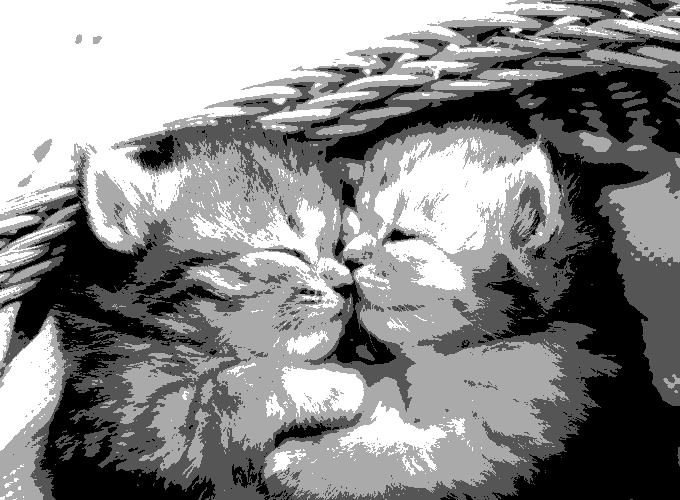


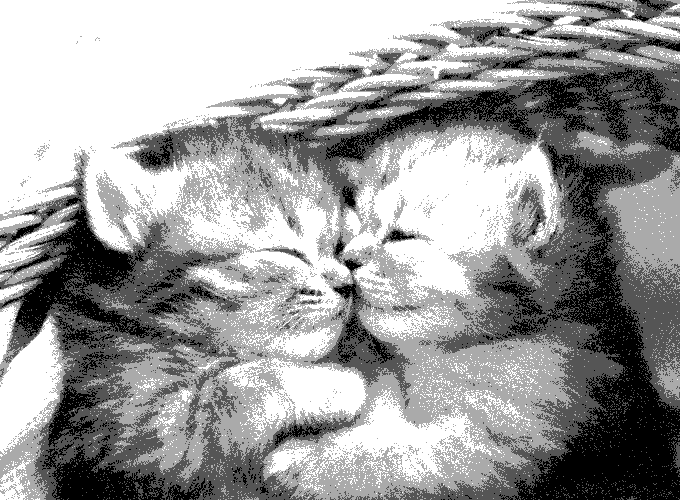


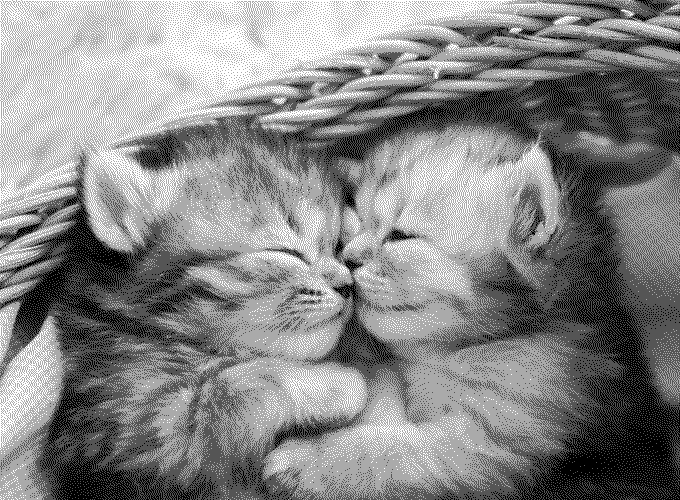

0.9814862745098039 1.0
PSNR quantization:  17.844233987781276
PSNR dithering: Image + Noise:  16.07411633861358
PSNR Floyd-Steinberg:  17.267212768078007


In [10]:
from skimage.filters import threshold_otsu

def quantize(image, L=1, N=4):
    T = np.linspace(0, L, N, endpoint=False)[1:]
    return np.digitize(image.flat, T).reshape(image.shape)/(N-1)


def dither(image, N=4, positions=None, weights=None):
    """Quantize an image, using dithering.
    Parameters
    ----------
    image : ndarray
        Input image.
    N : int
        Number of quantization levels.
    positions : list of (i, j) offsets
        Position offset to which the quantization error is distributed.
        By default, implement Sierra's "Filter Lite".
    weights : list of ints
        Weights for propagated error.
        By default, implement Sierra's "Filter Lite".
    References
    ----------
    http://www.efg2.com/Lab/Library/ImageProcessing/DHALF.TXT
    """
    image = image.copy()

    if positions is None or weights is None:
        positions = [(0, 1), (1, -1), (1, 0)]
        weights = [2, 1, 1]

    weights = weights / np.sum(weights)

    T = np.linspace(0, 1, N, endpoint=False)[1:]
    rows, cols = image.shape

    out = np.zeros_like(image, dtype=float)
    for i in range(rows):
        for j in range(cols):
            # Quantize
            out[i, j], = np.digitize([image[i, j]], T)

            # Propagate quantization noise
            d = (image[i, j] - out[i, j] / (N - 1))
            for (ii, jj), w in zip(positions, weights):
                ii = i + ii
                jj = j + jj
                if ii < rows and jj < cols:
                    image[ii, jj] += d * w

    return out/(N-1)


def floyd_steinberg(image, N):
    offsets = [(0, 1), (1, -1), (1, 0), (1, 1)]
    weights = [      7,
               3, 5, 1]
    return dither(image, N, offsets, weights)

# Image with 255 color levels
img = color.rgb2gray(io.imread('chat.jpg'))

# Quantize to N levels
N = 4
img_quant = quantize(img, N=N)

img_dither_random = img + np.abs(np.random.normal(size=img.shape,
                                           scale=1./(3 * N)))
img_dither_random = quantize(img_dither_random, L=1, N=N)

img_dither_fs = floyd_steinberg(img, N=N)

fig = px.imshow(img, binary_string=True)
fig.update_layout( title_text="Source image", title_x=0.5)
fig.show()
fig = px.imshow(img_quant, binary_string=True)
fig.update_layout( title_text="Quantization (N=%d)" % N, title_x=0.5)
fig.show()
fig = px.imshow(img_dither_random, binary_string=True)
fig.update_layout( title_text="Quantization: Image + Noise", title_x=0.5)
fig.show()
fig = px.imshow(img_dither_fs, binary_string=True)
fig.update_layout( title_text="Floyd-Steinberg", title_x=0.5)
fig.show()

print(img.max(), img_quant.max())
print("PSNR quantization: ", metrics.peak_signal_noise_ratio(img,img_quant))
print("PSNR dithering: Image + Noise: ", metrics.peak_signal_noise_ratio(img,img_dither_random))
print("PSNR Floyd-Steinberg: ", metrics.peak_signal_noise_ratio(img,img_dither_fs))

**Bonus Question:**

1. Compare the PSNR scores obtained and your own judgment of image quality. How do you explain this result?
2. What is the principle of dithering (Floyd-Steinberg)?
3. This is not a question... but there is another technique close to dithering but used by printers: halftoning. It is interesting to see how it works.



**Bonus answer:**

1. The obtained PSNR scores show that the image quality using dithering is slightly lower than the original way. This is different from my own judgment on the image quality. The human eye will think that the image quality using dithering is much higher than the original method. This is because a dithered image appears to have smoother transitions when viewed by the human eye, but a machine perceives dithering as adding noise to the image.
2. The principle of dithering, especially the Floyd\-Steinberg algorithm, is to distribute the quantization error of each pixel to its neighbors. This helps distribute errors more evenly across the image and can result in a smoother appearance with fewer visible artifacts.

